In [1]:
import pandas as pd
import polars as pl
from datetime import datetime, timedelta
import os
pd.set_option('display.max_columns', None)

In [2]:
BACK_DATA_PATH = '~/code/coralieclot/DataForGood/EclaireurPublic/13_eclaireur_public/back/data'
MP_PATH = os.path.join(BACK_DATA_PATH,'warehouse','marches_publics.parquet')
COMMUNITIES_PATH = os.path.join(BACK_DATA_PATH,'warehouse','communities.parquet')
SIRENE_PATH = os.path.join(BACK_DATA_PATH,'sirene','sirene.parquet')

pl_mp = pl.read_parquet(MP_PATH)
pl_communities = pl.read_parquet(COMMUNITIES_PATH)


In [87]:
df_mp= pl_mp.to_pandas()
df_collectivites= pl_communities.to_pandas()
df_mp.shape

(1508513, 67)

In [4]:
df_mp[['date_notification']].dtypes

date_notification    datetime64[ns, UTC]
dtype: object

In [6]:
df_mp.head()

,titulaire_id,id,acheteur_id,nature,objet,code_cpv,procedure,lieu_execution,duree_mois,date_notification,date_publication_donnees,montant,count_titulaires,attribution_avance,offres_recues,marche_innovant,ccag,sous_traitance_declaree,type_groupement_operateurs,considerations_sociales,considerations_environnementales,modalite_execution,technique,actes_sous_traitance,modifications,_type,source,id_accord_cadre,taux_avance,modifications_actes_sous_traitance,autorite_concedante,date_signature,date_debut_execution,valeur_globale,montant_subvention_publique,donnees_execution,concessionnaires,origine_ue,origine_france,offres_recues_source,marche_innovant_source,attribution_avance_source,sous_traitance_declaree_source,duree_mois_source,titulaire_denomination_sociale,uid,lieu_execution.code,lieu_execution.type_code,lieu_execution.nom,acheteur.nom,uuid,created_at,type_prix,term,titulaire_contact,updated_at,forme_prix,literal,titulaire_type_identifiant,annee_notification,annee_publication_donnees,obligation_publication,delai_publication_jours,cpv_2,cpv_8,cpv_2_label,cpv_8_label
0,87080218800058,2022-884095-01,21440114300018,Marché,Transports collectifs pour la Ville d'Orvault:...,60130000,Procédure adaptée,"{""code"": ""44700"", ""typeCode"": ""Code postal""}",12.0,2022-07-29 00:00:00+00:00,2024-08-30 00:00:00+00:00,46000.0,1,non,1,non,Pas de CCAG,non,Pas de groupement,"{""considerationSociale"": [""Pas de consid\u00e9...","{""considerationEnvironnementale"": [""Pas de con...","{""modaliteExecution"": [""Bons de commande""]}","{""technique"": [""Sans objet""]}","[{""sousTraitant"": {""typeIdentifiant"": ""SIRET"",...",[],Marché,e-marchespublics,,0.0,,,,,0.0,0.0,,,0.0,0.0,,,,,,None,None,None,None,None,None,None,NaT,Définitif révisable,None,None,NaT,Unitaire,Définitif révisable,SIRET,2022.0,2024.0,Obligatoire,763.0,60,60130000,Services de transport (à l'exclusion du transp...,Services spécialisés de transport routier de p...
1,43408539500763,2024-0202403100,21680066400015,Marché,"Travaux d'éclairage public, de signalisation l...",45233140,Procédure adaptée,"{""code"": ""68000"", ""typeCode"": ""Code postal""}",8.0,2024-07-11 00:00:00+00:00,2024-08-30 00:00:00+00:00,253530.0,1,non,2,non,Pas de CCAG,non,Pas de groupement,"{""considerationSociale"": [""Pas de consid\u00e9...","{""considerationEnvironnementale"": [""Pas de con...","{""modaliteExecution"": [""Tranches""]}","{""technique"": [""Sans objet""]}",,[],Marché,e-marchespublics,,0.0,,,,,0.0,0.0,,,0.0,0.0,,,,,,None,None,None,None,None,None,None,NaT,Définitif ferme,None,None,NaT,Forfaitaire,Définitif ferme,SIRET,2024.0,2024.0,Obligatoire,50.0,45,45233140,Travaux de construction,Travaux routiers
2,75349326100022,24-131-00,78070570300012,Marché,"LE MOLAY LITTRY - 53, 55, 57, 59, 61 et 63 rou...",45111100,Procédure adaptée,"{""code"": ""14330"", ""typeCode"": ""Code postal""}",2.0,2024-08-29 00:00:00+00:00,2024-08-30 00:00:00+00:00,113278.0,1,non,1,non,Travaux,non,Pas de groupement,"{""considerationSociale"": [""Pas de consid\u00e9...","{""considerationEnvironnementale"": [""Crit\u00e8...","{""modaliteExecution"": [""Sans objet""]}","{""technique"": [""Sans objet""]}",,[],Marché,e-marchespublics,,0.0,,,,,0.0,0.0,,,0.0,0.0,,,,,,None,None,None,None,None,None,None,NaT,Définitif ferme,None,None,NaT,Forfaitaire,Définitif ferme,SIRET,2024.0,2024.0,Obligatoire,1.0,45,45111100,Travaux de construction,Travaux de démolition
3,77622499000056,22-076,45220075100025,Marché,"Réalisation 11 logements collectifs, lot B5-D3...",44810000,Procédure avec négociation,"{""code"": ""35510"", ""typeCode"": ""Code postal""}",24.0,2022-11-23 00:00:00+00:00,2024-08-30 00:00:00+00:00,46678.0,1,non,1,non,Pas de CCAG,oui,Pas de groupement,"{""considerationSociale"": [""Pas de consid\u00e9...","{""considerationEnvironnementale"": [""Pas de con...","{""modaliteExecution"": [""Sans objet""]}","{""technique"": [""Sans objet""]}","[{""id"": 1, ""sousTraitant"": {""id"": ""90288561500...",[],Marché,e-marchespublics,,0.0,,,,,0.0,0

In [8]:
df_mp['obligation_publication'].value_counts()

obligation_publication
Obligatoire    1253314
Optionnel       253936
Name: count, dtype: int64

# Calcul du bareme

In [58]:


# Modification du format des colonnes date
# errors='coerce' will set invalid dates to Nat (Not a time)
# format='%Y-%m-%d' explicitly specifies the date format
# df_mp['date_notification']=pd.to_datetime(df_mp['date_notification'], errors='coerce', format='%Y-%m-%d')
# df_mp['date_publication_donnees']=pd.to_datetime(df_mp['date_publication_donnees'], errors='coerce', format='%Y-%m-%d')

# # Calule du nombre de jours entre la date de notification et la date de publication des données
# df_mp['nbjours']=df_mp['date_publication_donnees']-df_mp['date_notification']
# df_mp['nbjours']=df_mp['nbjours'].fillna('0 days')
# df_mp['nbjours'] = df_mp['nbjours'].dt.days.astype('int32')

# Création d'une colonne avec l'année de la date de notification afin de créer des datasets
# et des agrégations par année

# df_mp['annee']=df_mp['date_notification'].dt.year
# df_mp['annee']=df_mp['annee'].fillna(0).astype(int)

# Je veux supprimer les lignes où le nom de l'acheteur est vide
df_mp['acheteur_siren']=df_mp['acheteur_id'].str.extract(r'(\d{9})')
df_mp=df_mp.dropna(subset=['acheteur_siren'])
# Je supprime toutes les lignes dont les dates sont inférieures à 2018 (date de début de l'obligation de publication)
df_mp=df_mp[df_mp['annee_notification']>=2018]

# Mapping de obligation_publication vers (0 = pas d'obligation de publication, 1 = obligation de publication)
df_mp['obligation_publication_bool'] = df_mp['obligation_publication']\
                                            .map({'Obligatoire':1,'Optionnel':0})\
                                            .astype(int)

In [59]:
big_merge = df_mp.merge(df_collectivites[['siren']],
                              how='outer',
                              left_on='acheteur_siren',
                              right_on='siren',
                              indicator=True)

In [42]:
big_merge['_merge'].value_counts()

_merge
both          929858
left_only     574931
right_only     25732
Name: count, dtype: int64

In [77]:
big_merge[big_merge['_merge'] == 'right_only']

,titulaire_id,id,acheteur_id,nature,objet,code_cpv,procedure,lieu_execution,duree_mois,date_notification,date_publication_donnees,montant,count_titulaires,attribution_avance,offres_recues,marche_innovant,ccag,sous_traitance_declaree,type_groupement_operateurs,considerations_sociales,considerations_environnementales,modalite_execution,technique,actes_sous_traitance,modifications,_type,source,id_accord_cadre,taux_avance,modifications_actes_sous_traitance,autorite_concedante,date_signature,date_debut_execution,valeur_globale,montant_subvention_publique,donnees_execution,concessionnaires,origine_ue,origine_france,offres_recues_source,marche_innovant_source,attribution_avance_source,sous_traitance_declaree_source,duree_mois_source,titulaire_denomination_sociale,uid,lieu_execution.code,lieu_execution.type_code,lieu_execution.nom,acheteur.nom,uuid,created_at,type_prix,term,titulaire_contact,updated_at,forme_prix,literal,titulaire_type_identifiant,annee_notification,annee_publication_donnees,obligation_publication,delai_publication_jours,cpv_2,cpv_8,cpv_2_label,cpv_8_label,acheteur_siren,obligation_publication_bool,siren,_merge
146279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000438,right_only
146280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000545,right_only
146802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000776,right_only
147016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200002160,right_only
148767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200007078,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249100157,right_only
1146927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249500109,right_only
1146942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249500455,right_only
1146970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Trying to group with polars - but not working

In [ ]:
# count_nulls = lambda group_df: group_df.is_null().sum()

# bareme = _merge.group_by(['acheteur_siren', 'annee']).agg([
#             pl.count('id').alias('nb_lignes'),
#             pl.sum('obligation_publication').alias('nb_obligation_publication'),
#             pl.sum('montant').alias('montant_total'),
#             pl.median('nbjours').alias('nbjours_median'),
#             pl.col('cpv_8').map_elements(count_nulls).alias('nb_cpv_8_null'),
#             pl.col('lieu_execution.type_code').map_elements(count_nulls).alias('nb_lieu_execution_type_code_null'),
#             pl.col('lieu_execution.code').map_elements(count_nulls).alias('nb_lieu_execution_code_null'),
#             pl.col('lieu_execution.nom').map_elements(count_nulls).alias('nb_lieu_execution_nom_null'),
#             pl.col('forme_prix').map_elements(count_nulls).alias('nb_forme_prix_null'),
#             pl.col('objet').map_elements(count_nulls).alias('nb_objet_null'),
#             pl.col('nature').map_elements(count_nulls).alias('nb_nature_null'),
#             pl.col('duree_mois').map_elements(count_nulls).alias('nb_duree_mois_null'),
#             pl.col('procedure').map_elements(count_nulls).alias('nb_procedure_null'),
#             pl.col('titulaires').map_elements(count_nulls).alias('nb_titulaires_null'),
#             ]).reset_index()

# bareme

ColumnNotFoundError: titulaires

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'sink' <---
DF ["titulaire_id", "id", "acheteur_id", "nature", ...]; PROJECT */67 COLUMNS

# Back to pandas

In [63]:
coll_df = df_collectivites[['siren']].copy()

current_year = datetime.now().year
years = list(range(2018, current_year + 1))
years_df = pd.DataFrame({'annee':years}).copy()

coll_df['key'] = 0
years_df['key'] = 0

coll_years_df = pd.merge(coll_df,years_df, on='key').drop('key', axis=1)


_merge = coll_years_df.merge(df_mp,
                              how='left',
                              left_on=['siren','annee'],
                              right_on=['acheteur_siren','annee_notification'])

_merge


,siren,annee,titulaire_id,id,acheteur_id,nature,objet,code_cpv,procedure,lieu_execution,duree_mois,date_notification,date_publication_donnees,montant,count_titulaires,attribution_avance,offres_recues,marche_innovant,ccag,sous_traitance_declaree,type_groupement_operateurs,considerations_sociales,considerations_environnementales,modalite_execution,technique,actes_sous_traitance,modifications,_type,source,id_accord_cadre,taux_avance,modifications_actes_sous_traitance,autorite_concedante,date_signature,date_debut_execution,valeur_globale,montant_subvention_publique,donnees_execution,concessionnaires,origine_ue,origine_france,offres_recues_source,marche_innovant_source,attribution_avance_source,sous_traitance_declaree_source,duree_mois_source,titulaire_denomination_sociale,uid,lieu_execution.code,lieu_execution.type_code,lieu_execution.nom,acheteur.nom,uuid,created_at,type_prix,term,titulaire_contact,updated_at,forme_prix,literal,titulaire_type_identifiant,annee_notification,annee_publication_donnees,obligation_publication,delai_publication_jours,cpv_2,cpv_8,cpv_2_label,cpv_8_label,acheteur_siren,obligation_publication_bool
0,200053726,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200053726,2019,35181269800543,20190011000,20005372600028,Marché,25 BESANCON – Mission de contrôle technique p...,71631300,Procédure adaptée,"{""code"": ""25"", ""typeCode"": ""Code d\u00e9partem...",45.0,2019-07-08 00:00:00+00:00,2019-07-08 00:00:00+00:00,31155.0,1.0,None,None,None,None,None,None,None,None,None,None,None,[],Marché,ternum-bfc,None,None,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,BUREAU ALPES CONTROLES,None,None,None,None,None,6ABD49B5-79A5-4F1B-9C32-2190A2F25F72,NaT,None,None,None,NaT,Révisable,None,SIRET,2019.0,2019.0,Optionnel,0.0,71,71631300,"Services d'architecture, services de construct...",Services de contrôle technique de bâtiments,200053726,0.0
2,200053726,2019,34099192600023,20192019S0006000,20005372600028,Accord-cadre,Prestations relatives à l'exploitation des ser...,60000000,Procédure avec négociation,"{""code"": ""58"", ""typeCode"": ""Code d\u00e9partem...",48.0,2019-06-20 00:00:00+00:00,2019-06-20 00:00:00+00:00,0.0,1.0,None,None,None,None,None,None,None,None,None,None,None,[],Marché,ternum-bfc,None,None,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,VOYAGES GONIN,None,None,None,None,None,834FCB56-9546-4DCB-928E-C3340DE35217,NaT,None,None,None,NaT,Révisable,None,SIRET,2019.0,2019.0,Optionnel,0.0,60,60000000,Services de transport (à l'exclusion du transp...,Services de transport (à l'exclusion du transp...,200053726,0.0
3,200053726,2019,34099192600023,20192019S0005900,20005372600028,Accord-cadre,Prestations relatives à l'exploitation des ser...,60000000,Appel d'offres ouvert,"{""code"": ""58"", ""typeCode"": ""Code d\u00e9partem...",48.0,2019-06-20 00:00:00+00:00,2019-06-20 00:00:00+00:00,0.0,1.0,None,None,None,None,None,None,None,None,None,None,None,[],Marché,ternum-bfc,None,None,None,None,None,None,NaN,NaN,None,None,None,None,None,None,None,None,None,VOYAGES GONIN,None,None,None,None,None,27F71722-A490-4F5B-8B95-14AF6EB49B4E,NaT,None,None,None,NaT,Révisable,None,SIRET,2019.0,2019.0,Optionnel,0.0,60,60000000,Services de transport (à l'exclusion du transp...,Services de transport (à l'exclusion du transp...,200053726,0.0
4,200053726,2019,53012956800016,20190010900,20005372600028,Marché,Mission de maîtrise d'oeuvre pour la restructu...,71000000,Procédure avec négociation,"{""code"": ""58"", ""typeCode"": ""Code d\u00e9partem...",35.0,2019-07-03 00:00:00+00:00,2019-07-03 00:00:00+00:00,317500.0,1.0,None,None,None,None,None,None,None,None,None,None,None,[],Marché,ternum-bfc,None,None,None,None,None,None,NaN,NaN,None,None,None,None,None,None,No

In [80]:
def median_delay(series):
    """Custom aggregation function to avoid warning when slice contains only NaN values"""
    if all(series.isna()):
        return None
    return series.median()

bareme = _merge.groupby(['siren', 'annee']).agg({
            'id' : pd.Series.count,
            'obligation_publication_bool' : pd.Series.sum,
            'montant' : pd.Series.sum,
            'delai_publication_jours' : median_delay,
            'date_notification' : pd.Series.count,
            'cpv_8': pd.Series.count,
            'lieu_execution.type_code': pd.Series.count,
            'lieu_execution.code': pd.Series.count,
            'lieu_execution.nom': pd.Series.count,
            'forme_prix': pd.Series.count,
            'objet': pd.Series.count,
            'nature': pd.Series.count,
            'duree_mois': pd.Series.count,
            'procedure': pd.Series.count,
            'titulaire_id': pd.Series.count
            }).reset_index()

bareme_completude = bareme[['montant',
                            'date_notification',
                            'cpv_8',
                            'lieu_execution.type_code',
                            'lieu_execution.code',
                            'lieu_execution.nom',
                            'forme_prix',
                            'objet',
                            'nature',
                            'duree_mois',
                            'procedure',
                            'titulaire_id']]


bareme['E'] = bareme['id'].map(lambda x: 1 if x > 0 else 0)
bareme['D'] = bareme['obligation_publication_bool'].map(lambda x: 1 if x > 0 else 0)
bareme['C'] = (bareme['id']-bareme['obligation_publication_bool']).map(lambda x: 1 if x > 0 else 0)
bareme['B'] = bareme_completude.all(axis=1).map(int)
bareme['A'] = bareme['delai_publication_jours'].map(lambda x: 1 if x <= 60 else 0)

def score_total(row):
    if row['E'] == 0:
        return 'E'
    if row['D'] == 0:
        return 'D'
    if row['C'] == 0:
        return 'C'
    if row['B'] == 0:
        return 'B'
    return 'A'

bareme['mp_score'] = bareme.apply(score_total, axis=1)
bareme=bareme.filter(items=['siren','annee','mp_score'])

bareme

,siren,annee,mp_score
0,200000172,2018,D
1,200000172,2019,A
2,200000172,2020,A
3,200000172,2021,A
4,200000172,2022,A
...,...,...,...
289555,249740119,2021,C
289556,249740119,2022,C
289557,249740119,2023,B
289558,249740119,2024,C


# Check de note sur un exemple de collectivité qui manquait des marches publics

In [81]:
bareme.loc[bareme['siren']=='200000438']

,siren,annee,mp_score
8,200000438,2018,E
9,200000438,2019,E
10,200000438,2020,E
11,200000438,2021,E
12,200000438,2022,E
13,200000438,2023,E
14,200000438,2024,E
15,200000438,2025,E


# Grosse fonction qui reprend tout

In [3]:
def bareme_marchepublics(marches_publics, communities):

    """
    Create a notation per community for marches publics
    """

    marches_pd = marches_publics.to_pandas()
    communities_pd = communities.to_pandas()

    # Calcul du siren acheteur
    marches_pd['acheteur_siren']=marches_pd['acheteur_id'].str.extract(r'(\d{9})')

    # Suppression des lignes sans acheteur_id
    marches_pd = marches_pd.dropna(subset=['acheteur_siren'])

    # Mapping de obligation_publication vers (0 = pas d'obligation de publication, 1 = obligation de publication)
    marches_pd['obligation_publication_bool'] = marches_pd['obligation_publication']\
                                                .map({'Obligatoire':1,'Optionnel':0})\
                                                .astype(int)


    # suppression de toutes les lignes dont les dates sont inférieures à 2018 (date de début de l'obligation de publication)
    marches_pd = marches_pd[marches_pd['annee_notification']>=2018]



    # Merge avec les collectivités

    ## Création d'un dataframe coll_years_df avec collectivité et années
    coll_df = communities_pd[['siren']].copy()

    current_year = datetime.now().year
    years = list(range(2018, current_year + 1))
    years_df = pd.DataFrame({'annee':years}).copy()

    coll_df['key'] = 0
    years_df['key'] = 0

    coll_years_df = pd.merge(coll_df,years_df, on='key').drop('key', axis=1)

    ## Left join des marchés publics avec le dataframe coll_years_df
    _merge = coll_years_df.merge(marches_pd,
                                how='left',
                                left_on=['siren','annee'],
                                right_on=['acheteur_siren','annee_notification'])

    # Groupement par siren (collectivité) et année
    def median_delay(series):
        """Custom aggregation function to avoid warning when slice contains only NaN values"""
        if all(series.isna()):
            return None
        return series.median()

    bareme = _merge.groupby(['siren', 'annee']).agg({
                'id' : pd.Series.count,
                'obligation_publication_bool' : pd.Series.sum,
                'montant' : pd.Series.sum,
                'delai_publication_jours' : median_delay,
                'date_notification' : pd.Series.count,
                'cpv_8': pd.Series.count,
                'lieu_execution.type_code': pd.Series.count,
                'lieu_execution.code': pd.Series.count,
                'lieu_execution.nom': pd.Series.count,
                'forme_prix': pd.Series.count,
                'objet': pd.Series.count,
                'nature': pd.Series.count,
                'duree_mois': pd.Series.count,
                'procedure': pd.Series.count,
                'titulaire_id': pd.Series.count
                }).reset_index()

    # Calcul du bareme

    ## Listes des colonnes obligatoires pour la completude des données
    ## (on vérifie que ces colonnes ont au moins une valeur non nulle par groupement)
    colonnes_completude = bareme[['montant',
                                'date_notification',
                                'cpv_8',
                                'lieu_execution.type_code',
                                'lieu_execution.code',
                                'lieu_execution.nom',
                                'forme_prix',
                                'objet',
                                'nature',
                                'duree_mois',
                                'procedure',
                                'titulaire_id']]

    ## Note E : présence de données
    ## Note D : au moins une données avec obligation de publication
    ## Note C : au moins une donnée sans obligation de publication
    ## Note B : toutes les colonnes obligatoires sont présentes
    ## Note A : délai de publication median inférieur à 60 jours
    bareme['E'] = bareme['id'].map(lambda x: 1 if x > 0 else 0)
    bareme['D'] = bareme['obligation_publication_bool'].map(lambda x: 1 if x > 0 else 0)
    bareme['C'] = (bareme['id']-bareme['obligation_publication_bool']).map(lambda x: 1 if x > 0 else 0)
    bareme['B'] = colonnes_completude.all(axis=1).map(int)
    bareme['A'] = bareme['delai_publication_jours'].map(lambda x: 1 if x <= 60 else 0)

    def score_total(row):
        if row['E'] == 0:
            return 'E'
        if row['D'] == 0:
            return 'D'
        if row['C'] == 0:
            return 'C'
        if row['B'] == 0:
            return 'B'
        return 'A'

    bareme['mp_score'] = bareme.apply(score_total, axis=1)
    bareme=bareme.filter(items=['siren','annee','mp_score'])

    return pl.from_pandas(bareme)


In [4]:
bareme_marchepublics(pl_mp, pl_communities)

siren,annee,mp_score
str,i64,str
"""200000172""",2018,"""D"""
"""200000172""",2019,"""A"""
"""200000172""",2020,"""A"""
"""200000172""",2021,"""A"""
"""200000172""",2022,"""A"""
…,…,…
"""249740119""",2021,"""C"""
"""249740119""",2022,"""C"""
"""249740119""",2023,"""B"""


<Axes: xlabel='Score_total'>

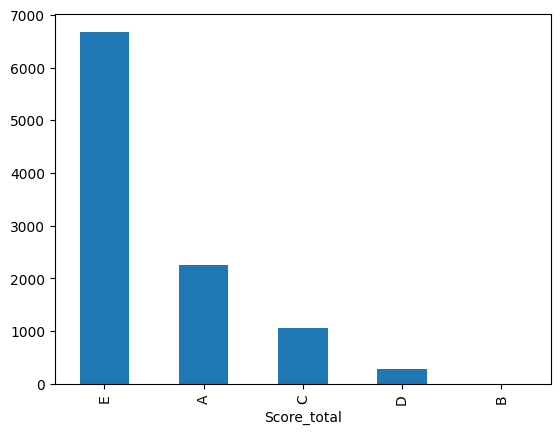

In [24]:
#Créer un digramme à barre avec le volume de lignes pour chaque valeur du score_total
df_score['Score_total'].value_counts().plot(kind='bar')